In [8]:
import matplotlib.pyplot as pp
import numpy as np
import math

wr_set = [(0.25, 43),(0.5, 101),(1, 223),(2, 478),(3.1, 750),(4.97, 1264)] # world records 400m to 5000m
jm_set = [(0.25, 54),(0.5, 120),(1, 275),(2, 600),(3.1, 960),(4.97, 1610)] # ya boy
ms_set = [(0.25, 55),(0.5, 121),(1, 272),         (3.1, 925),(4.97, 1560)] # max, naturally

allsets = wr_set + jm_set + ms_set


In [9]:
def plot_set(sets):
    for points in sets:
        
        
        x_data = []
        y_data = []
        for p in points:
            
            x_data.append(p[0])
            y_data.append(p[1])
        pp.scatter(x_data,y_data,marker="x")

        
        #curve_x = []
        #curve_y = []
        #for x in np.linspace(0.25,x_data[-1],20):
        #   curve_x.append(x)
        #   curve_y.append(try_log(x))
        #pp.scatter(curve_x,curve_y,marker="o")

            
    pp.show()

    
    
def try_log_tuple(x):
    #print(x)
    a = 320
    b = 125
    y = a - b*(math.e**(0-x))
    return (x,y)
    
def try_log(x):
    #print(x)
    a = 320
    b = 125
    y = a - b*(math.e**(0-x))
    return y
    
def graphable_curve(function,args,max_x):
    points = []
    for x in np.linspace(0.25,max_x,100):
        points.append((x,function(x)))
    return points

In [10]:
def dt_to_spm(old_set):
    new_set = []
    for old_tuple in old_set:
        if old_tuple[0]!=0:
            new_tuple = (old_tuple[0],old_tuple[1]/old_tuple[0])
            new_set.append(new_tuple)
        else:
            new_tuple = (old_tuple[0],old_tuple[1]/0.00001)
            new_set.append(new_tuple)
    return new_set

In [11]:

curve = graphable_curve(try_log,6)
plot_set([dt_to_spm(wr_set),curve])

TypeError: graphable_curve() missing 1 required positional argument: 'max_x'

In [12]:
def yfunc(x,a,b,c):
    return (a * x * x) + (b * x) + c


In [13]:
def func_list(a,b,c):
    returnable = []
    for x in np.linspace(0.25,5,50):
        returnable.append((x,yfunc(a,b,c,x)))
    return returnable

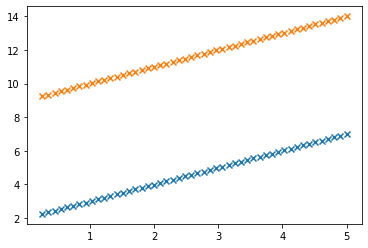

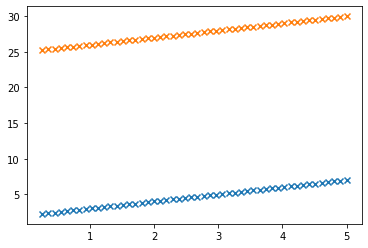

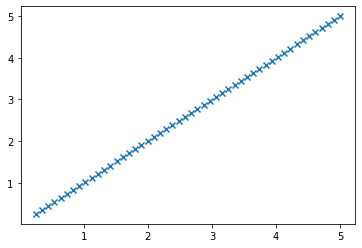

In [14]:
new_curve1 = func_list(1,1,1)
new_curve2 = func_list(3,1,0)
plot_set([new_curve1,new_curve2])

new_curve1 = func_list(1,1,1)
new_curve2 = func_list(5,1,0)
plot_set([new_curve1,new_curve2])

new_curve1 = func_list(1,1,1)
new_curve2 = func_list(1,0,0)
plot_set([new_curve2])

In [15]:
def checkbound(comparison,points,function):
    for p in points:
        x = p[0]
        y_p = p[1]
        y_c = function(x)
        
        if comparison == -1:
            if y_p > y_c:
                return False
        elif comparison == -10:
            if y_p >= y_c:
                return False
            
        elif comparison == 1:
            if y_p <= y_c:
                return False
        elif comparison == 10:
            if y_p < y_c:
                return False
        else:
            print("invalid comparison '"+str(comparison)+"'")
    return True

In [16]:
checkbound(1,[(-1,4)],yfunc)


TypeError: yfunc() missing 3 required positional arguments: 'a', 'b', and 'c'

In [ ]:
#
c = graphable_curve(try_log,5)
p1 = (4,300)
p2 = (5,300)
plot_set([c,[p1,p2]])
print(checkbound(1,[p1,p2],try_log))
print(checkbound(-1,[p1,p2],try_log))
print("left point")
print(checkbound(1,[p1],try_log))
print(checkbound(-1,[p1],try_log))
print("right point")
print(checkbound(1,[p2],try_log))
print(checkbound(-1,[p2],try_log))

In [17]:
def trycollide(curve1,curve2):
    print()

In [18]:
# proof of concept
c = graphable_curve(try_log,5)
p1 = (1,300)
p2 = (2,300)
p3 = (3,300)
plot_set([c,[p1,p2,p3]])
print(checkbound(1,[p1,p2,p3],try_log))
print(checkbound(-1,[p2,p3],try_log))


TypeError: graphable_curve() missing 1 required positional argument: 'max_x'

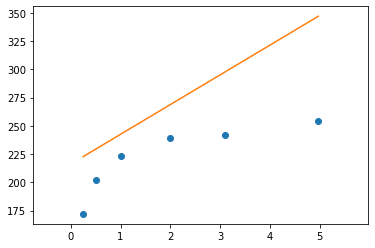

In [32]:


points = np.array(dt_to_spm(wr_set))

x = points[:,0] #extract x and y's from points set
y = points[:,1]

z = np.polyfit(np.log(x), y, 1)# determining polynomial
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

pp.plot(x,y,'o', x_new, y_new)
pp.xlim([x[0]-1, x[-1] + 1 ])
pp.show()

In [20]:
points = np.array(dt_to_spm(ms_set+jm_set))

x = points[:,0] #extract x and y's from points set
y = points[:,1]

fit = np.polyfit(np.log(x), y, 1)# determining polynomial
#f = np.poly1d(z)
print(fit)

x_c = []
y_c = []

new_curve = graphable_logcurve(fit)
for p in new_curve:
    x_c.append(p[0])
    y_c.append(p[1])
    
pp.plot(x,y,'o')
pp.plot(x_c,y_c,'o')

#pp.plot(x,y,'o', x_new, y_new)
#pp.xlim([x[0]-1, x[-1] + 1 ])
pp.show()

[ 34.19339786 267.48827767]


NameError: name 'graphable_logcurve' is not defined

In [ ]:
def logab(x,a,b):
    return b+np.log(x)*a

a = 26.32538971 
b = 216.12682087

print(logab(1,a,b))
print(logab(2,a,b))
print(logab(3,a,b))
print(logab(4,a,b))
print(logab(5,a,b))
print(logab(6,a,b))

In [21]:
def graphable_logcurve(args):
    print("--")
    print(args)
    max_x = 5
    a = args[0]
    b = args[1]
    
    points = []
    for x in np.linspace(0.01,max_x,100):
        points.append((x,logab(x,a,b)))
    return points

#argset = (1,0)
#new_curve = graphable_logcurve(argset)
#plot_set([new_curve])

In [22]:
def points_to_log(points):
    pts = np.array(dt_to_spm(points))
    x = pts[:,0] #extract x and y's from points set
    y = pts[:,1]
    fit = np.polyfit(np.log(x), y, 1)# determining polynomial
    #print(fit)
    return log_eq(fit)

In [23]:
pts = np.array(dt_to_spm(allsets))

points_to_log(pts)



NameError: name 'log_eq' is not defined

In [24]:
class log_eq():
    def __init__(self,args):
        self.a = args[0]
        self.b = args[1]
        print(fit)
        print(self.f(5))
        print("----")
    def f(self,x):
        return self.b+np.log(x)*self.a 

In [25]:
print(allsets)
test1 = points_to_log(allsets)

[(0.25, 43), (0.5, 101), (1, 223), (2, 478), (3.1, 750), (4.97, 1264), (0.25, 54), (0.5, 120), (1, 275), (2, 600), (3.1, 960), (4.97, 1610), (0.25, 55), (0.5, 121), (1, 272), (3.1, 925), (4.97, 1560)]
[ 34.19339786 267.48827767]
299.36896263177255
----


In [26]:
test1.f(2)/2

135.44626737993562

[ 34.19339786 267.48827767]
299.36896263177255
----


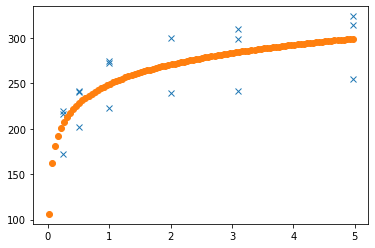

[ 34.19339786 267.48827767]
328.6423754842581
----


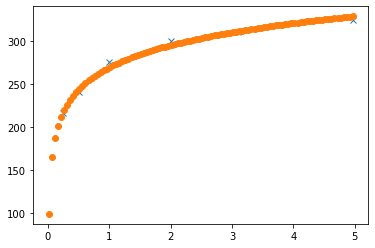

[ 34.19339786 267.48827767]
258.49590113629864
----


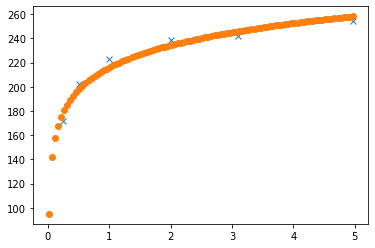

In [29]:
def fitset(data):    

    points = np.array(dt_to_spm(data))
    x = points[:,0] #extract x and y's from points set
    y = points[:,1]

    fiteq = points_to_log(data)
    x_c = np.linspace(0.01,max(x),100)
    y_c = fiteq.f(x_c)

    pp.plot(x,y,'x')
    pp.plot(x_c,y_c,'o')
    pp.show()
    
fitset(allsets)
fitset(jm_set)
fitset(wr_set)

[ 34.19339786 267.48827767]
400.06187554198766
----


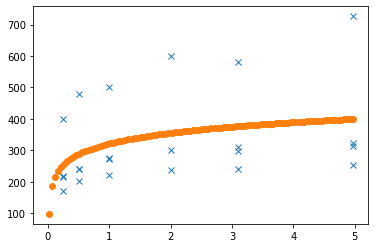

In [33]:
derp_shit = [(0.25, 100),(0.5, 240),(1, 500),(2, 1200),(3.1, 1800),(4.97, 3610)]
fitset(derp_shit+allsets)

In [185]:
def minsec(minutes,seconds):
    return (minutes*60)+seconds
def hourminsec(hours,minutes,seconds):
    return (hours*3600)+(minutes*60)+seconds

[ 34.19339786 267.48827767]
328.4459425702394
----
[ 34.19339786 267.48827767]
314.14808729459673
----


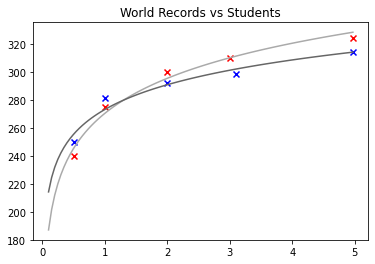

In [189]:


def minsec(minutes,seconds):
    return (minutes*60)+seconds
def hourminsec(hours,minutes,seconds):
    return (hours*3600)+(minutes*60)+seconds
def yeetus2(): 
    
    setA = [(0.25, 43),(0.5, 101),(1, 219),(2, 478),(3.13, 769),(4.97, 1264)]
    #ms = [(0.25, 55),(0.5, 130),(1, 265),(1.2,369),(3.1, 925),(4.97, 1560)]
    #jm = [(0.25, 54),(0.5, 120),(1, 275),(2, 600),(2.95, 960),(4.97, 1610)]
    #rm = [(0.5,minsec(2,1)),(1,minsec(4,25)),(2,minsec(10,23)),(3.17,minsec(16,23)),(4.99,minsec(27,12))]
    #bk = [(0.62,minsec(3,0)),(1.86,minsec(9,20)),(3.17,minsec(15,15)),(4.97,minsec(25,15))]
   

    jmm = [(0.5, 120), (1, 275), (2, 600), (3, 930), (4.97, 1610)]
    rm = [(0.5,minsec(2,1)),(1,minsec(4,25)),(2,minsec(10,23)),(3.17,minsec(16,23)),(4.99,minsec(27,12))]
    ms = [(0.5,minsec(2,5)),(1,minsec(4,41)),(2,minsec(9,44)),(3.1,minsec(15,24)),(4.97,minsec(26,0))]#,(13.1,hourminsec(1,28,22))
    bk = [(0.62,minsec(3,0)),(1.86,minsec(9,20)),(3.17,minsec(15,15)),(4.97,minsec(25,15))]
    rb = [(3, 915), (5, 1573)]
    students = jmm + ms + rm + bk + rb


    setA += [(3,830),(1, 240)] 
    colors = ["red","blue"]
    sets = [jmm,ms]
    for s in sets:
        if colors == []:
            colors.append("orange")
        thiscolor = colors.pop(0)
        
        points = np.array(dt_to_spm(s))
        x = points[:,0]
        y = points[:,1]
        pp.scatter(x,y,marker="x",color=thiscolor)

    fiteq = points_to_log(jmm)
    x_c = np.linspace(0.1,max(x),100)
    y_c = fiteq.f(x_c)
    pp.plot(x_c,y_c,color="#aaaaaa")
    
    fiteq = points_to_log(ms)
    x_c = np.linspace(0.1,max(x),100)
    y_c = fiteq.f(x_c)
    pp.plot(x_c,y_c,color="#666666")
    
    
    pp.title("World Records vs Students")
    pp.xlabel = "Distance (Miles)"
    pp.ylabel = "Duration (Seconds)"
    pp.show()
    
yeetus2()